In [27]:
import numpy as np
import pandas as pd
import os, glob, sys
import matplotlib.pyplot as plt
sys.path.append('/glade/u/home/guoqiang/CTSM_repos/ctsm_optz/MO-ASMO/src')
import NSGA2

In [48]:
# iters = [0,1,2,3]
iters = [0,1]
# b=97
# b=256
# b=329
b=202
# b=160

# new mo-asmo

In [50]:

df_new = pd.DataFrame()
for i in iters:
    f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/MOASMO_exps_widerange_allsample/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
    df = pd.read_csv(f)
    df['iter']=i
    df_new = pd.concat([df_new, df])
    
# df_new = pd.DataFrame()
# for i in iters:
#     f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/MOASMO_exps/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
#     df = pd.read_csv(f)
#     df['iter']=i
#     df_new = pd.concat([df_new, df])


df_old = pd.DataFrame()
for i in iters:
    f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
    df = pd.read_csv(f)
    df['iter']=i
    df_old = pd.concat([df_old, df])

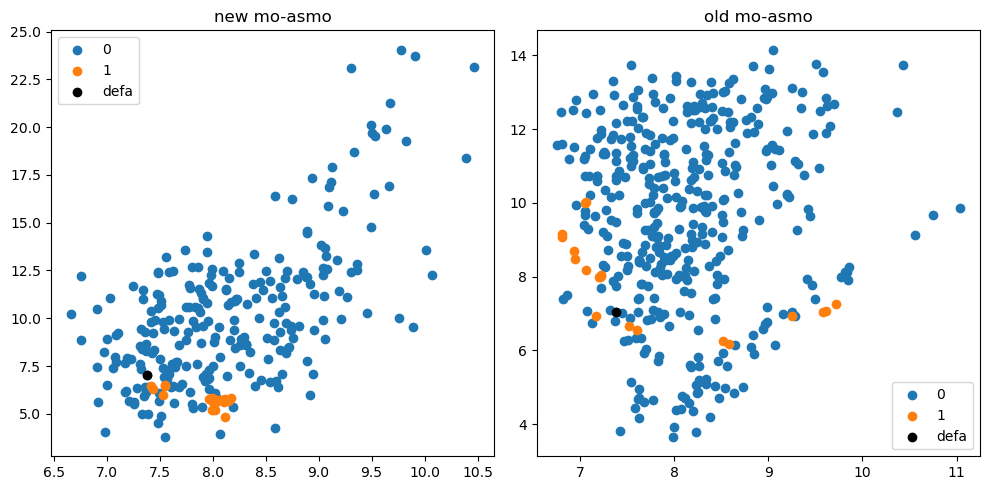

In [51]:

fig = plt.figure(figsize=[10,5])

fig.add_subplot(1,2,1)
data = df_new.values
for i in iters:
    ind = data[:,2]==i
    plt.scatter(data[ind,0], data[ind,1], label=i)
plt.scatter(data[0,0],data[0,1],color='k',label='defa')
plt.title('new mo-asmo')
plt.legend()

fig.add_subplot(1,2,2)
data = df_old.values
for i in iters:
    ind = data[:,2]==i
    plt.scatter(data[ind,0], data[ind,1], label=i)
plt.scatter(data[0,0],data[0,1],color='k',label='defa')
plt.title('old mo-asmo')
plt.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'old mo-asmo')

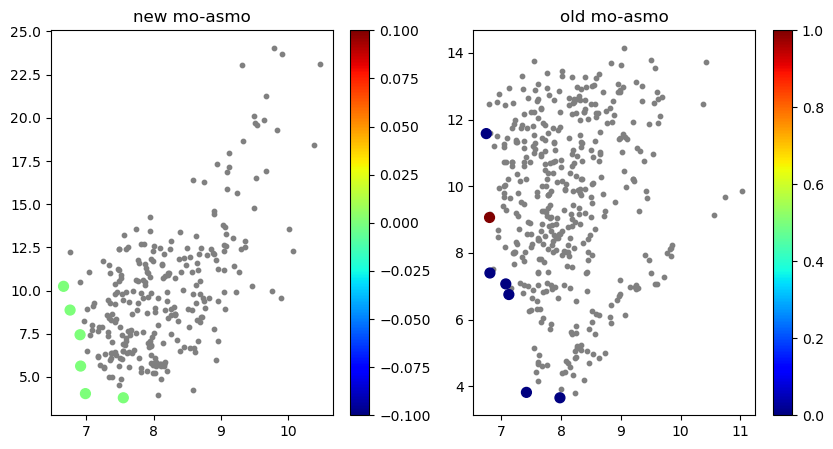

In [53]:
fig = plt.figure(figsize=[10,5])

iterations = np.hstack([np.zeros(256), np.ones(25)])

fig.add_subplot(1,2,1)

data = df_new.values
rank,dom=NSGA2.fast_non_dominated_sort(data)

ind = rank==0
plt.scatter(data[:,0], data[:,1], 10, color='grey')
plt.scatter(data[ind,0], data[ind,1], 50, iterations[ind], cmap='jet')
plt.colorbar()
plt.title('new mo-asmo')

fig.add_subplot(1,2,2)

data = df_old.values
rank,dom=NSGA2.fast_non_dominated_sort(data)
iterations = np.hstack([np.zeros(400), np.ones(20)])
ind = rank==0
plt.scatter(data[:,0], data[:,1], 10, color='grey')
plt.scatter(data[ind,0], data[ind,1], 50, iterations[ind], cmap='jet')
plt.colorbar()
plt.title('old mo-asmo')